In [28]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [29]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [30]:
x,y = make_classification(n_classes=2,n_features=2,n_samples=10000,n_redundant=0,n_clusters_per_class=1)

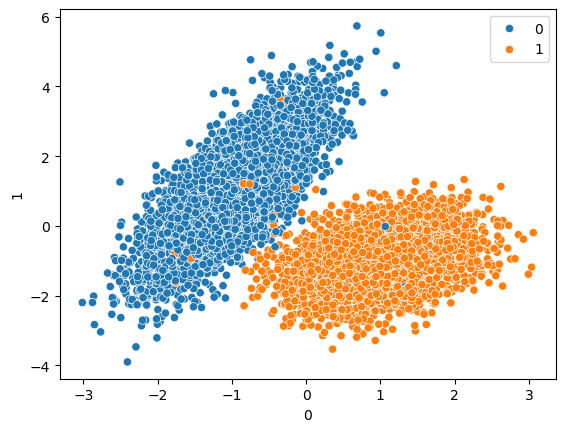

In [31]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)
plt.show()

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(kernel="linear")

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=10)

In [35]:
svc.fit(xtrain,ytrain)

SVC(kernel='linear')

In [36]:
## Predictions
ypred = svc.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1270
           1       1.00      0.99      0.99      1230

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

[[1265    5]
 [  13 1217]]


In [37]:
rbf =SVC(kernel="rbf")
rbf.fit(xtrain,ytrain)

SVC()

In [38]:
## Predictions
ypred = rbf.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1270
           1       1.00      0.99      0.99      1230

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

[[1264    6]
 [   9 1221]]


In [39]:
polynomial =SVC(kernel="poly")
polynomial.fit(xtrain,ytrain)
## Predictions
ypred = polynomial.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1270
           1       0.99      0.99      0.99      1230

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

[[1257   13]
 [  10 1220]]


In [40]:
sigmoid =SVC(kernel="sigmoid")
sigmoid.fit(xtrain,ytrain)
## Predictions
ypred = sigmoid.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1270
           1       0.97      0.96      0.97      1230

    accuracy                           0.97      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.97      0.97      0.97      2500

[[1238   32]
 [  46 1184]]


In [41]:
## Hyperparameter tuning with SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [42]:

#defining parameter range
params = {
    "C":[0.1,1,10,100,1000],
    "gamma":[1,0.1,0.01,0.001,0.0001],
    "kernel":["rbf","poly","sigmoid","linear"]
}

In [43]:
grid = GridSearchCV(SVC(),refit=True,param_grid=params,cv=2,verbose=3)

In [44]:
grid.fit(xtrain,ytrain)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 1/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.989 total time=   0.0s
[CV 2/2] END .......C=0.1, gamma=1, kernel=poly;, score=0.989 total time=   0.0s
[CV 1/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.931 total time=   0.0s
[CV 2/2] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.939 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.994 total time=   0.0s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.991 total time=   0.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.991 total time=   0.0s
[CV 1/2] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.979 total time=   0.2s
[CV 2/2] END .....C=0.1, gamma=0.1, kernel=pol

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [46]:

ypred = grid.predict(xtest)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(confusion_matrix(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1270
           1       1.00      0.99      0.99      1230

    accuracy                           0.99      2500
   macro avg       0.99      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

[[1264    6]
 [  10 1220]]


### SVM Kernels Indepth Intuition And Practical Explanation

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [48]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

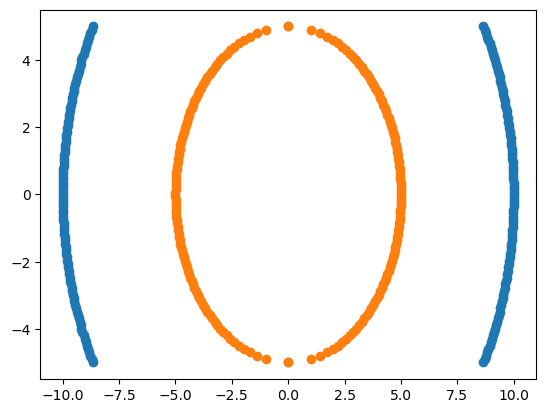

In [49]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

In [50]:
np.vstack([y,x]).T

array([[ 8.66025404, -5.        ],
       [ 8.71779204, -4.8989899 ],
       [ 8.77378994, -4.7979798 ],
       [ 8.82827705, -4.6969697 ],
       [ 8.88128118, -4.5959596 ],
       [ 8.93282873, -4.49494949],
       [ 8.98294476, -4.39393939],
       [ 9.03165312, -4.29292929],
       [ 9.07897646, -4.19191919],
       [ 9.12493632, -4.09090909],
       [ 9.16955321, -3.98989899],
       [ 9.21284664, -3.88888889],
       [ 9.25483518, -3.78787879],
       [ 9.29553652, -3.68686869],
       [ 9.3349675 , -3.58585859],
       [ 9.37314414, -3.48484848],
       [ 9.41008171, -3.38383838],
       [ 9.44579475, -3.28282828],
       [ 9.4802971 , -3.18181818],
       [ 9.51360192, -3.08080808],
       [ 9.54572176, -2.97979798],
       [ 9.57666854, -2.87878788],
       [ 9.60645359, -2.77777778],
       [ 9.63508769, -2.67676768],
       [ 9.66258107, -2.57575758],
       [ 9.68894344, -2.47474747],
       [ 9.714184  , -2.37373737],
       [ 9.73831149, -2.27272727],
       [ 9.76133416,

In [73]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df["Y"].value_counts()

Y
0    200
1    200
Name: count, dtype: int64

In [74]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [75]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### Polynoimal Kernel

In [76]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,1.0,-5.00000,0,1.0,25.000000,-5.00000
1,1.0,-4.89899,0,1.0,24.000102,-4.89899
2,1.0,-4.79798,0,1.0,23.020610,-4.79798
3,1.0,-4.69697,0,1.0,22.061524,-4.69697
4,1.0,-4.59596,0,1.0,21.122845,-4.59596


In [77]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [79]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0,stratify=y)


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [81]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [82]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.94

In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.93

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.88